# Data Loader Basics
https://visualstudiomagazine.com/articles/2020/09/10/pytorch-dataloader.aspx?m=1


In [43]:
# dataloader_demo.py
# PyTorch 1.5.0-CPU  Anaconda3-2020.02  
# Python 3.7.6  Windows 10 

import numpy as np
import torch as T
device = T.device("cpu")  # apply to Tensor or Module

# -----------------------------------------------------------

# predictors and label in same file
# data has been normalized and encoded like:
#   sex     age      region   income    politic
#   [0]     [2]       [3]      [6]       [7]
#   1 0   0.057143   0 1 0    0.690871    2

class PeopleDataset(T.utils.data.Dataset):

    def __init__(self, src_file, num_rows=None):
        x_tmp = np.loadtxt(src_file, max_rows=num_rows,
          usecols=range(0,7), delimiter="\t", skiprows=0,
          dtype=np.float32)
        y_tmp = np.loadtxt(src_file, max_rows=num_rows,
          usecols=7, delimiter="\t", skiprows=0, dtype=np.int32)

        self.x_data = T.tensor(x_tmp, dtype=T.float32).to(device)
        self.y_data = T.tensor(y_tmp, dtype=T.long).to(device)

    def __len__(self):
        return len(self.x_data)  # required

    def __getitem__(self, idx):
        if T.is_tensor(idx):
            idx = idx.tolist()
        preds = self.x_data[idx, 0:7]
        pol = self.y_data[idx]
        sample = \
            { 'predictors' : preds, 'political' : pol }
        return sample





In [44]:
# -----------------------------------------------------------


print("\nBegin PyTorch DataLoader demo ")

# 0. misc. prep
T.manual_seed(0)
np.random.seed(0)

print("\nSource data looks like: ")
print("1 0  0.171429  1 0 0  0.966805  0")
print("0 1  0.085714  0 1 0  0.188797  1")
print(" . . . ")

# 1. create Dataset and DataLoader object
print("\nCreating Dataset and DataLoader ")

train_file = "people_train.txt"
train_ds = PeopleDataset(train_file, num_rows=8)

bat_size = 3
train_ldr = T.utils.data.DataLoader(train_ds,
batch_size=bat_size, shuffle=True)

# 2. iterate thru training data twice
for epoch in range(2):
    print("\n==============================\n")
    print("Epoch = " + str(epoch))
    for (batch_idx, batch) in enumerate(train_ldr):
        print("\nBatch = " + str(batch_idx))
        X = batch['predictors']  # [3,7]
        # Y = T.flatten(batch['political'])  # 
        Y = batch['political']   # [3]
        print(X)
        print(Y)
    print("\n==============================")

print("\nEnd demo ")




Begin PyTorch DataLoader demo 

Source data looks like: 
1 0  0.171429  1 0 0  0.966805  0
0 1  0.085714  0 1 0  0.188797  1
 . . . 

Creating Dataset and DataLoader 


Epoch = 0

Batch = 0
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.6909],
        [1.0000, 0.0000, 0.1714, 1.0000, 0.0000, 0.0000, 0.9668],
        [1.0000, 0.0000, 0.1714, 1.0000, 0.0000, 0.0000, 0.8029]])
tensor([2, 0, 0])

Batch = 1
tensor([[1.0000, 0.0000, 0.0571, 0.0000, 1.0000, 0.0000, 1.0000],
        [0.0000, 1.0000, 0.0857, 0.0000, 1.0000, 0.0000, 0.1888],
        [0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0166]])
tensor([1, 1, 2])

Batch = 2
tensor([[1.0000, 0.0000, 0.2571, 0.0000, 1.0000, 0.0000, 0.3299],
        [0.0000, 1.0000, 0.1714, 1.0000, 0.0000, 0.0000, 0.9668]])
tensor([0, 1])



Epoch = 1

Batch = 0
tensor([[1.0000, 0.0000, 0.1714, 1.0000, 0.0000, 0.0000, 0.9668],
        [1.0000, 0.0000, 0.0571, 0.0000, 1.0000, 0.0000, 1.0000],
        [1.0000, 0.0000, 0.2571, 0.0000, 1.0000, 

# A Comprehensive Guide to the DataLoader Class and Abstractions in PyTorch

https://blog.paperspace.com/dataloaders-abstractions-pytorch/

In [51]:
# Import MNIST
from torchvision.datasets import MNIST

# Download and Save MNIST 
data_train = MNIST('~/mnist_data', train=True, download=True)

# Print Data
print(data_train)
print(data_train[12])

Dataset MNIST
    Number of datapoints: 60000
    Root location: /home/bob/mnist_data
    Split: Train
(<PIL.Image.Image image mode=L size=28x28 at 0x7FE78420EFA0>, 3)


The label of the image is: 5


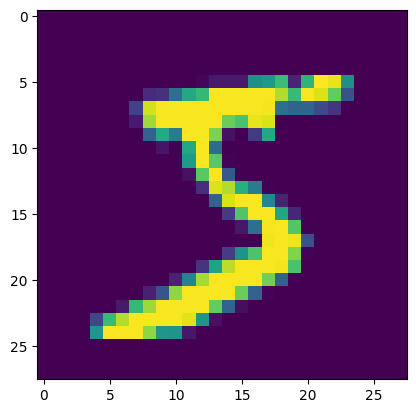

In [52]:
import matplotlib.pyplot as plt

random_image = data_train[0][0]
random_image_label = data_train[0][1]

# Print the Image using Matplotlib
plt.imshow(random_image)
print("The label of the image is:", random_image_label)


In [57]:
import torch
from torchvision import transforms

data_train = torch.utils.data.DataLoader(
    MNIST(
          '~/mnist_data', train=True, download=True, 
          transform = transforms.Compose([
              transforms.ToTensor()
          ])),
          batch_size=64,
          shuffle=True
          )

#for batch_idx, samples in enumerate(data_train):
      #print(batch_idx, samples)


In [78]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

class SquareDataset(Dataset):
    def __init__(self, a=0, b=1):
        super(Dataset, self).__init__()
        assert a <= b
        self.a = a
        self.b = b
    def __len__(self):
        return self.b - self.a + 1
        
    def __getitem__(self, index):
        assert self.a <= index <= self.b
        return index, index**2

data_train = SquareDataset(a=1,b=64)
data_train_loader = DataLoader(data_train, batch_size=64, shuffle=True)
print(len(data_train))


64


In [105]:
# Single Folder of Iamges Dataloader

In [107]:
import torchvision.datasets as datasets

# Create a dataloader for the folder of images
dataloader = torch.utils.data.DataLoader(
    datasets.ImageFolder(
        'FireImages/Fire/',
        transform=torchvision.transforms.ToTensor()
    ),
    batch_size=16,
    shuffle=True
)

# Iterate over the dataloader
for images, _ in dataloader:
    print(images)
    


tensor([[[[0.5255, 0.5333, 0.5020,  ..., 0.5176, 0.4863, 0.4431],
          [0.4863, 0.4980, 0.4588,  ..., 0.5176, 0.4824, 0.4431],
          [0.4902, 0.4941, 0.4706,  ..., 0.5451, 0.5255, 0.5020],
          ...,
          [0.9020, 0.9020, 0.9059,  ..., 0.8745, 0.8745, 0.8745],
          [0.8941, 0.9059, 0.9098,  ..., 0.8706, 0.8745, 0.8784],
          [0.9020, 0.9137, 0.9098,  ..., 0.8706, 0.8706, 0.8745]],

         [[0.4863, 0.4941, 0.4667,  ..., 0.4902, 0.4588, 0.4078],
          [0.4588, 0.4706, 0.4353,  ..., 0.4824, 0.4431, 0.4000],
          [0.4745, 0.4784, 0.4510,  ..., 0.5059, 0.4824, 0.4549],
          ...,
          [0.9059, 0.9059, 0.9098,  ..., 0.9137, 0.9137, 0.9137],
          [0.8980, 0.9098, 0.9137,  ..., 0.9098, 0.9137, 0.9176],
          [0.9059, 0.9176, 0.9137,  ..., 0.9098, 0.9098, 0.9137]],

         [[0.4235, 0.4314, 0.4039,  ..., 0.4275, 0.4078, 0.3647],
          [0.4000, 0.4196, 0.3843,  ..., 0.4196, 0.3922, 0.3608],
          [0.4235, 0.4275, 0.4078,  ..., 0